In [1]:
#installing the necessary libraries

!pip install tensorflow opencv-python matplotlib

In [2]:
#importing the necessary libraries

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import imghdr

In [3]:
#Specifying the Dataset directory

data_dir = '/content/drive/MyDrive/Brain Tumor CT scan Images/Data'


In [4]:
#Checking if the dataset has loaded correctly

os.listdir(data_dir)

['Tumor', 'Healthy']

In [5]:
#Finding the number of images in the 2 classes

tumor = os.listdir(os.path.join(data_dir, 'Tumor'))
len(tumor)

2318

In [6]:
healthy = os.listdir(os.path.join(data_dir, 'Healthy'))
len(healthy)

2300

We have 2318 tumorous and 2300 healthy images. The classes are balanced.

In [7]:
#Giving the extensions we want

exts = ['jpg', 'jpeg', 'png', 'bmp']


In [8]:
#Removing images that do not have these extensions

for image_class in os.listdir(data_dir):
  for images in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, images)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if img not in exts:
        print("The image has an issue", image_path)
        os.remove(image_path)

    except Exception as e:
      print("No Issue with image", image_path)


No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (296).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (554).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (2072).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (523).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (467).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (312).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (2136).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (234).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (217).jpg
No Issue with image /content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor/ct_tumor (478).jp

In [9]:
#Loading the images
import pandas as pd

dataset = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4618 files belonging to 2 classes.


In [10]:
#Data conversion to a numpy array

data_iterator = dataset.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7d3726ee8b80>)

In [11]:
#Seeing the data in one batch

batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [12]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

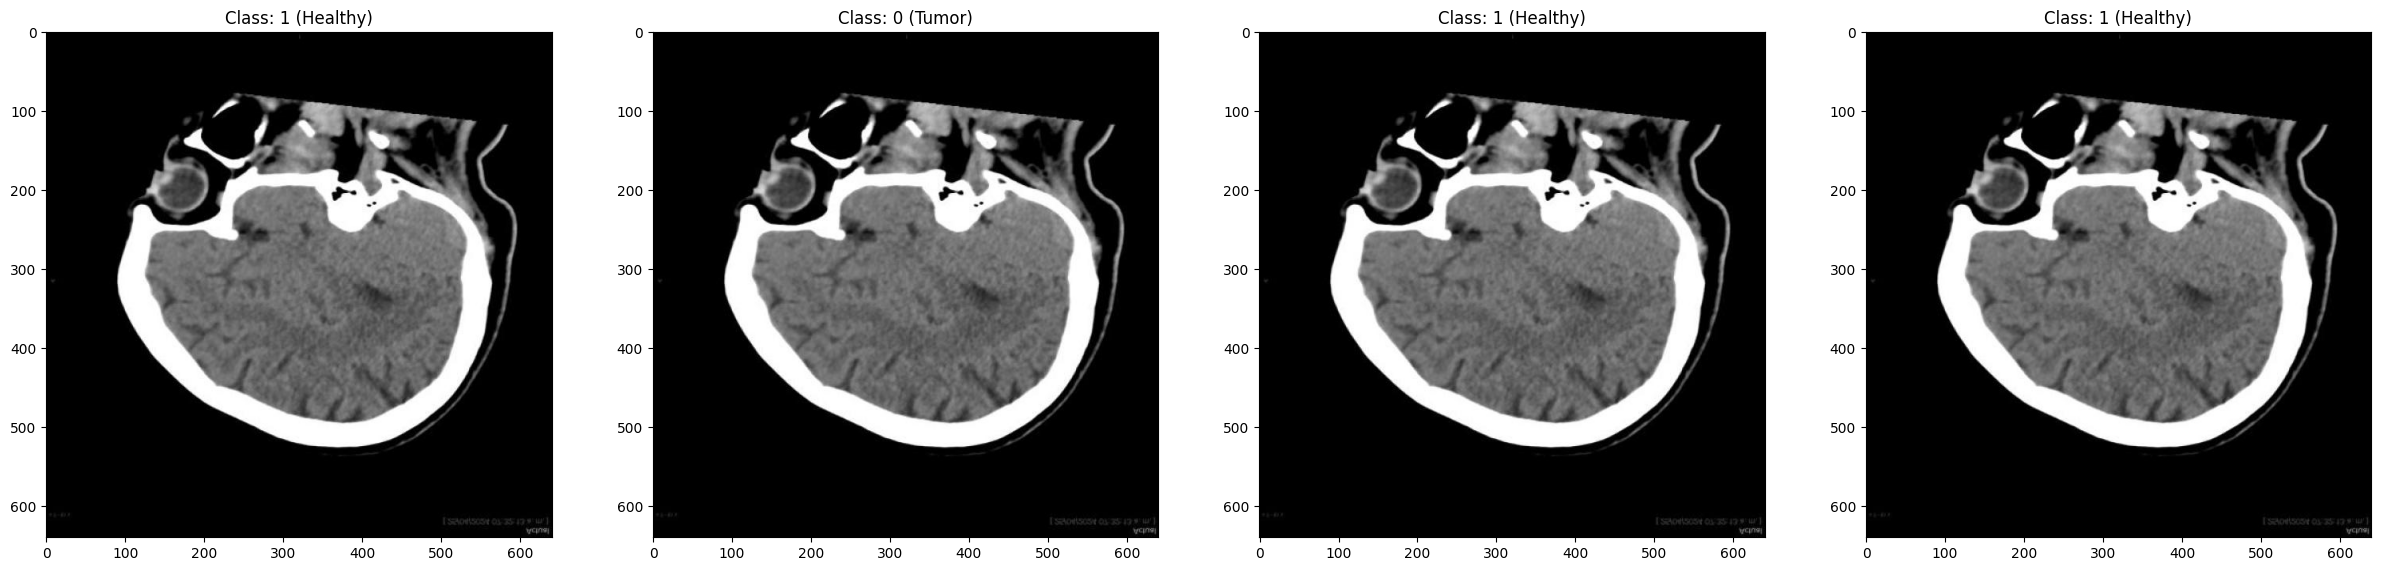

In [13]:
# Visualization of the images

class_mapping = {0: "Tumor", 1: "Healthy"}

fig, ax = plt.subplots(ncols = 4, figsize = (30,30))

for index, image in enumerate(batch[0][:4]):
  ax[index].imshow(img.astype(int))
  class_label = batch[1][index]
  ax[index].title.set_text(f"Class: {class_label} ({class_mapping[class_label]})")


- Class 1 represents healthy
- Class 2 represents brain tumor

### Preprocessing

In [14]:
#Scaling

dataset = dataset.map(lambda X, y: (X/255, y))

In [15]:
#Minimum values in the scaled dataset

dataset.as_numpy_iterator().next()[0].max()

1.0

In [16]:
len(dataset)

145

In [17]:
#splitting

train_size = int(len(dataset) * .7)
val_size = int(len(dataset) * .2)
test_size = int(len(dataset) * .1)+1

print(train_size)
print(val_size)
print(test_size)


101
29
15


In [18]:
#Creating the train, val and test dataset

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

print(len(train))
print(len(val))
print(len(test))

101
29
15


In [19]:
# #Augmenting, Rescaling and resizing to add new data


# from tensorflow.keras import layers, models



# additional_data_pipeline = tf.keras.Sequential({
#     layers.RandomZoom(0.2),
#     layers.RandomContrast(0.2),
#     layers.RandomFlip('horizontal_and_vertical'),
#     layers.RandomRotation(0.2),
#     layers.Resizing(256,256),
#     layers.Rescaling(1.0/255)
# })

# def additional_data(image, label):
#   image = additional_data_pipeline(image)
#   return image, label


In [20]:
# train = train.map(additional_data)

In [22]:
#Model Building

#Importing the necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D




model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (6, 6), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



In [23]:
#Compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#Getting the model summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 58, 58, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 58, 58, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 27, 27, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 820,609 (3.13 MB)

 Trainable params: 819,777 (3.13 MB)

 Non-trainable params: 832 (3.25 KB)

In [26]:
#Fitting the model

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train, validation_data=val, epochs=20, callbacks=[early_stopping])

#history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 315ms/step - accuracy: 0.8222 - loss: 0.4278 - val_accuracy: 0.4914 - val_loss: 1.6574
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.9104 - loss: 0.2419 - val_accuracy: 0.6584 - val_loss: 0.6404
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.9253 - loss: 0.2064 - val_accuracy: 0.5948 - val_loss: 0.7614
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.9413 - loss: 0.1599 - val_accuracy: 0.6638 - val_loss: 0.4990
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.9335 - loss: 0.1489 - val_accuracy: 0.8470 - val_loss: 0.3406
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.9658 - loss: 0.0946 - val_accuracy: 0.9731 - val_loss: 0.0769
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9625 - loss: 0.0890 - val_accuracy: 0.9741 - val_loss: 0.0795
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9703 - loss: 0

In [27]:
history.history

{'accuracy': [0.8719059228897095,
  0.9124380946159363,
  0.9365717768669128,
  0.9486386179924011,
  0.9504950642585754,
  0.9675123691558838,
  0.9644182920455933,
  0.9706064462661743,
  0.9724628925323486,
  0.9780321717262268,
  0.9805074334144592,
  0.9820544719696045,
  0.9873143434524536,
  0.9811262488365173,
  0.9771039485931396,
  0.9854578971862793,
  0.9910272359848022,
  0.9950494766235352,
  0.9925742745399475,
  0.9935024976730347],
 'loss': [0.3180021047592163,
  0.22221235930919647,
  0.17470863461494446,
  0.1382950097322464,
  0.12479722499847412,
  0.08792299032211304,
  0.09028904885053635,
  0.07443266361951828,
  0.07037456333637238,
  0.0577487014234066,
  0.05348442122340202,
  0.04729214683175087,
  0.036331504583358765,
  0.05328775942325592,
  0.06491386890411377,
  0.03504585102200508,
  0.024227723479270935,
  0.01987951435148716,
  0.022761989384889603,
  0.019182004034519196],
 'val_accuracy': [0.4913793206214905,
  0.6584051847457886,
  0.5948275923728

### Plotting the performace of the model

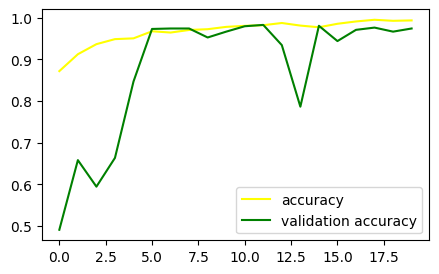

In [33]:
#Accuracy

plt.figure(figsize = (5,3))
plt.plot(history.history['accuracy'], color = 'yellow', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

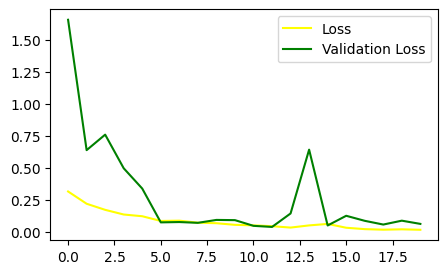

In [34]:
#Loss

plt.figure(figsize = (5,3))
plt.plot(history.history['loss'], color = 'yellow', label = 'Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.show()

### Model Evaluation

In [36]:
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

re = Recall()
pre = Precision()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():

  X,y = batch
  y_predict = model.predict(X)
  re.update_state(y, y_predict)
  pre.update_state(y, y_predict)
  acc.update_state(y, y_predict)

print('Recall -',re.result().numpy())
print('Precision -',pre.result().numpy())
print('Binary Accuracy -',acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Recall - 0.9502488
Precision - 0.99272346
Binary Accuracy - 0.96888644


### Testing on a new image

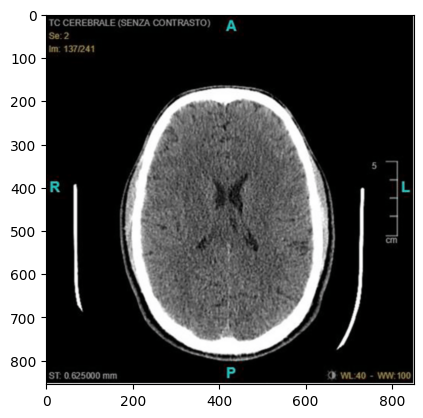

In [42]:
healthy = cv2.imread('/content/drive/MyDrive/Brain Tumor CT scan Images/Data/healthy_ct_image_test.png')
plt.imshow(healthy)
plt.show()

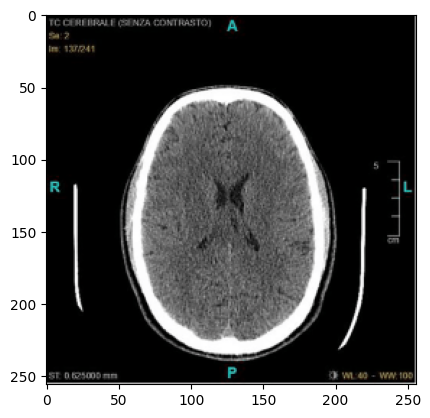

In [43]:
  #Resizing the image

resize = tf.image.resize(healthy, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
#Making predictions

import numpy as np

prediction = model.predict(np.expand_dims(resize/255, 0))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


array([[0.02903062]], dtype=float32)

Anything less than 0.5 is healthy, anything more has a tumor. Thus this is a healthy brain.

### Predictions on a tumorous brain

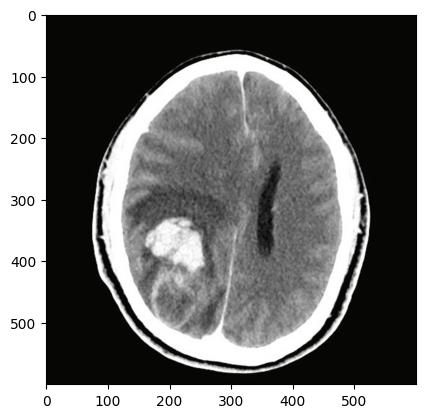

In [46]:
#Displaying the image

tumor = cv2.imread('/content/drive/MyDrive/Brain Tumor CT scan Images/Data/tumor_ct_image_test.png')
plt.imshow(tumor)
plt.show()

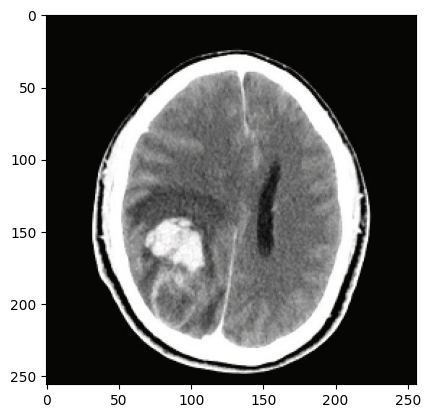

In [47]:
#Resizing the image

resize = tf.image.resize(tumor, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
#Making predictions

pred = model.predict(np.expand_dims(resize/255,0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.99069595]], dtype=float32)

Since the model has a prediction of 0.99, which is above 0.5, this can be classified as a tumorous brain.

### Saving the model

In [50]:
model.save(os.path.join('/content/drive/MyDrive/Brain Tumor CT scan Images/Model', 'CT_Scan_Healthy_Tumor_Classification.h5'))

In [54]:
#Renaming the model

from tensorflow.keras.models import load_model

new_model = load_model(os.path.join('/content/drive/MyDrive/Brain Tumor CT scan Images/Model', 'CT_Scan_Healthy_Tumor_Classification.h5'))
new_model

<Sequential name=sequential_1, built=True>

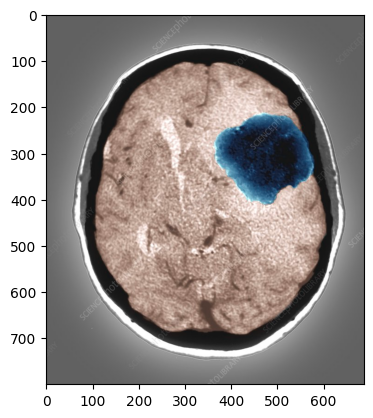

In [55]:
#Testing on a new image

tumor2 = cv2.imread('/content/drive/MyDrive/Brain Tumor CT scan Images/Data/Tumor2_test.jpg')
plt.imshow(tumor2)
plt.show()

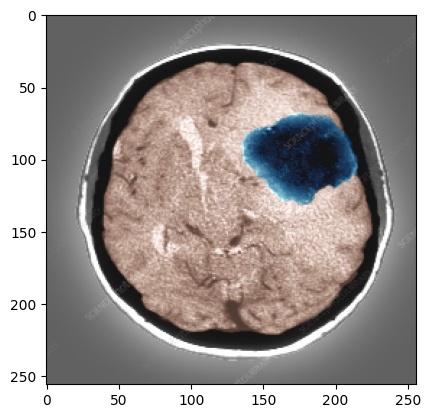

In [56]:
#Resizing

resize = tf.image.resize(tumor2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
#Prediction

predic = new_model.predict(np.expand_dims(resize/255, 0))
predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


array([[0.9929763]], dtype=float32)

The model accurately classifies the image as tumorous at an accuracy of 0.99